In [1]:
img_width,img_height = 150,150
train_data_path = '../dataset/Training set'
test_data_path = '../dataset/Testing set'
nb_train_sample = 10
nb_test_sample = 10
epochs = 10
batch_size = 5

In [2]:
import keras.backend as kera

if kera.image_data_format()=='channels_first':
    input_shape = (3,img_width,img_height)
else:
    input_shape = (img_width,img_height,3)

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation
# Dense: fully connected layer
# Conv2d: convolution layer
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
# /255 normalizing image data
# horizontal_flip to increase dataset
train_generator = train_datagen.flow_from_directory(train_data_path,target_size=(img_width,img_height),batch_size= batch_size,class_mode='binary',classes=['men','women'])

Found 1641 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_data_path,target_size=(img_width,img_height),batch_size= batch_size,class_mode='binary')

Found 666 images belonging to 2 classes.


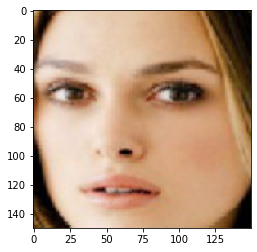

In [6]:
plt.imshow(train_generator[0][0][2])


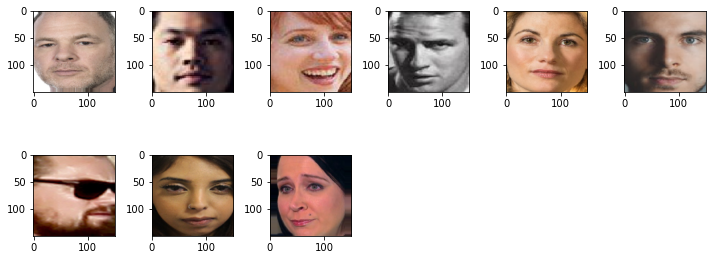

In [41]:
plt.figure(figsize=(10,10))
for i in range(2,11):
    plt.subplot(5,6,i-1)
    for X_batch,Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [31]:
model1 = Sequential()
model1.add(Conv2D(64,(3,3),input_shape=input_shape)) # 64 neurons with 3*3 filter
# create convolutional neural network to extract feature from the images

model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2))) # to reduce size of image
# model1.add(Dropout(0.2)) # if our model learns a lot we need to remove some nodes.

model1.add(Flatten())
model1.add(Dense(64)) # 64 neurons with 3*3 filter
# no. of output modes in hiden layers

model1.add(Activation('relu'))
model1.add(Dense(1)) # output layer (1 neuron at last)

model1.add(Activation('sigmoid'))
# model1.summary()

In [42]:
model1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
training = model1.fit(train_generator,steps_per_epoch=nb_train_sample,epochs=epochs,validation_data=test_generator,validation_steps=nb_test_sample)

Epoch 1/10
10/10 [==============================] - 6s 625ms/step - loss: 0.4928 - accuracy: 0.8000 - val_loss: 1.3036 - val_accuracy: 0.4600
Epoch 2/10
10/10 [==============================] - 8s 848ms/step - loss: 0.5953 - accuracy: 0.8000 - val_loss: 1.2704 - val_accuracy: 0.3400
Epoch 3/10
10/10 [==============================] - 6s 572ms/step - loss: 0.6274 - accuracy: 0.6200 - val_loss: 0.6012 - val_accuracy: 0.7000
Epoch 4/10
10/10 [==============================] - 5s 527ms/step - loss: 0.6983 - accuracy: 0.7000 - val_loss: 0.3786 - val_accuracy: 0.8800
Epoch 5/10
10/10 [==============================] - 5s 529ms/step - loss: 0.5688 - accuracy: 0.6800 - val_loss: 0.8965 - val_accuracy: 0.5000
Epoch 6/10
10/10 [==============================] - 5s 499ms/step - loss: 0.5609 - accuracy: 0.8000 - val_loss: 0.5334 - val_accuracy: 0.8200
Epoch 7/10
10/10 [==============================] - 5s 495ms/step - loss: 0.5864 - accuracy: 0.7200 - val_loss: 0.4044 - val_accuracy: 0.8200
Epoch 

In [50]:
training.history['val_accuracy'][-1]

0.6600000262260437

In [56]:
loss, acc = model1.evaluate(test_generator,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.7569681406021118
Test Accuracy: 0.6261261105537415


In [59]:
model1.save('gender_detection.h5')

In [7]:
from keras.preprocessing import image
import numpy as np
from tensorflow import keras
model1 = keras.models.load_model('gender_detection.h5')

In [10]:
img_pred = image.load_img('../sample_male.png',target_size=(150,150))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis=0)

result = model1.predict(img_pred)

if result[0][0]==1:
    print('Female')
else:
    print('Male')

Male
